In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import joblib

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [4]:
data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [5]:
features = ['profile pic', 'fullname words', 'name==username','external URL', 'description length', 'private', '#posts', '#followers', '#follows']
label = ['fake']

In [6]:
scaler = QuantileTransformer(n_quantiles=100)
data[features] = scaler.fit_transform(data[features])
data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1.0,0.27,0.000000,0.0,0.0,0.835859,0.0,0.0,0.636364,0.812467,0.867336,0
1,1.0,0.00,0.752525,0.0,0.0,0.801347,0.0,0.0,0.909603,0.903221,0.724404,0
2,1.0,0.10,0.752525,0.0,0.0,0.000000,0.0,1.0,0.545455,0.506473,0.345324,0
3,1.0,0.00,0.343434,0.0,0.0,0.903643,0.0,0.0,0.970431,0.666150,0.782242,0
4,1.0,0.00,0.752525,0.0,0.0,0.000000,0.0,1.0,0.439394,0.500550,0.385129,0


In [7]:
X = data[features]
Y = data[label]

In [8]:
model = RandomForestClassifier(n_estimators=300)
model.fit(X, Y.values.ravel()) 

RandomForestClassifier(n_estimators=300)

In [9]:
test_data = pd.read_csv('test.csv')
test_data[features] = scaler.transform(test_data[features])
X_test = test_data[features]
Y_test = test_data[label]
test_data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1.0,0.33,0.343434,0.33,1.0,0.731844,0.0,1.0,0.647215,0.695098,0.759851,0
1,1.0,0.00,0.989899,0.00,0.0,0.871175,0.0,1.0,0.368687,0.234848,0.050505,0
2,1.0,0.00,0.752525,0.00,0.0,0.903643,0.0,1.0,0.920109,0.624714,0.789211,0
3,1.0,0.00,0.343434,0.00,0.0,0.984037,0.0,1.0,0.904082,0.951069,0.999534,0
4,1.0,0.50,0.343434,0.00,0.0,0.894765,0.0,1.0,0.439394,0.576270,0.602163,0


In [10]:
Y_pred = model.predict(X_test)

In [11]:
print(accuracy_score(Y_test,Y_pred)*100)

95.83333333333334


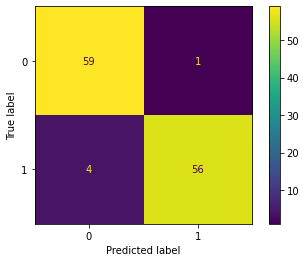

In [12]:
plot_confusion_matrix(model, X=X_test, y_true=Y_test)

In [13]:
joblib.dump(model, "trained_model.pkl")

['trained_model.pkl']

In [14]:
joblib.dump(scaler, "trained_scaler.pkl")

['trained_scaler.pkl']